In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#remove a duplicate in a list
a=[1,2,4,6,7,8,1,3,4]
def remove_duplicates(values):
    output = []
    seen = set()
    for value in values:
        # If value has not been encountered yet,
        # ... add it to both list and set.
        if value not in seen:
            output.append(value)
            seen.add(value)
    return output
print(remove_duplicates(a))

[1, 2, 4, 6, 7, 8, 3]


In [3]:
 #remove a duplicate in a list
np.unique(a)

array([1, 2, 3, 4, 6, 7, 8])

In [4]:
#drop duplicates in a data frame
a=np.array([[1,1,2],[1,3,3],[5,6,6]])
b=pd.DataFrame(a,columns=list('ABC'))
print b
print b.drop_duplicates(subset='A', keep="first")

   A  B  C
0  1  1  2
1  1  3  3
2  5  6  6
   A  B  C
0  1  1  2
2  5  6  6


You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests? 


In [5]:
#python
requested_accepted=pd.DataFrame(
    {'time':['5/17/2017','5/18/2017','5/20/2017'],
     'accepter_id':['10001','10002','1003'],
     'requester_id':['1003', '1002','1005']
})
friend_reqested=pd.DataFrame(
    {'time':['4/17/2017','4/18/2017','4/19/2017','4/21/2017','4/23/2017'],
     'sent_to_id':['1','2','3','4','5'],
     'requester_id':['1001', '1002','1003','1004','1005']
})
len(np.unique(requested_accepted['requester_id']))/float(len(np.unique(friend_reqested['requester_id'])))


0.6

In [6]:
#using SQL 
%load_ext sql
%sql sqlite://

'Connected: None@None'

In [7]:
%%sql
Create Table requested_accepted(time varchar(10), 
                                accepter_id varchart(10), 
                                requester_id varchart (10));

Done.


[]

In [8]:
%%sql
Insert into requested_accepted Values('5/17/2017','10001','1003');
Insert into requested_accepted Values('5/18/2017','10002','1002');
Insert into requested_accepted Values('5/20/2017','10003','1005');

1 rows affected.
1 rows affected.
1 rows affected.


[]

In [9]:
%sql select * from requested_accepted

Done.


time,accepter_id,requester_id
5/17/2017,10001,1003
5/18/2017,10002,1002
5/20/2017,10003,1005


In [10]:
%%sql
Create Table friend_reqested (time varchar(10), 
                                sent_to_id varchart(10), 
                                requester_id varchart (10));

Done.


[]

In [11]:
%%sql
Insert into friend_reqested Values('4/17/2017','1','1001');
Insert into friend_reqested Values('4/18/2017','2','1002');
Insert into friend_reqested Values('4/19/2017','3','1003');
Insert into friend_reqested Values('4/21/2017','4','1004');
Insert into friend_reqested Values('4/23/2017','5','1005');

1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [12]:
%sql select * from friend_reqested

Done.


time,sent_to_id,requester_id
4/17/2017,1,1001
4/18/2017,2,1002
4/19/2017,3,1003
4/21/2017,4,1004
4/23/2017,5,1005


In [13]:
%%sql
select CAST(count(distinct R.requester_id) AS FLOAT)/count(distinct F.requester_id) as accptedrate
from friend_reqested F
left join requested_accepted R
on F.requester_id=R.requester_id

Done.


accptedrate
0.6


Do some research and summarize the business model of your dream company, or company that you interview with.
What is the product
Who are the customer
How do they make money
Why do you want to work for this company?


1.My dream company is paypal, the product is paypal, a worldwide online payment system.
2.The target customer is every single person and small business.
3.Two ways Paypal can make money: one way is charing to a payment recipient, another way is earning interest against the money that you have sitting in your account.
4.Paypal is the largest company in online payment industry. I am the loyal customer of Paypal. paypal can provide the most safe and easiest way to transfer money, which benefit to our life. 

In [14]:
import datetime
df=pd.read_csv('BA501_python_data.csv')
df.date=pd.to_datetime(df.date, format='%Y%m%d')
df.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [15]:
sum(df['spend_usd'][df.experiment_id==12624548])

397069.86045892676

In [16]:
sum(df['spend_usd'][df.experiment_id==12624549])

395487.78414993605

In [17]:
df.head(5)
np.unique(df.vertical)

array(['ANDROID_APPS', 'COMMERCE', 'MAGAZINES', 'MULTI_CONTAINER', 'MUSIC',
       'OCEAN', 'YOUTUBE'], dtype=object)

In [18]:
np.unique(df.country)

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'AE',
       'AR', 'AT', 'AU', 'BE', 'BR', 'CA', 'CH', 'CZ', 'DE', 'DK', 'DZ',
       'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'HK', 'HR', 'HU', 'ID', 'IE',
       'IL', 'IN', 'IS', 'IT', 'JP', 'KR', 'KW', 'LV', 'MX', 'MY', 'NL',
       'NO', 'NZ', 'OM', 'PK', 'PL', 'PR', 'PT', 'RO', 'RS', 'RU', 'SA',
       'SE', 'SG', 'SK', 'TH', 'TR', 'TW', 'UA', 'US', 'VN', 'ZA'], dtype=object)

In [19]:
a=df.experiment_id
np.unique(a)

array([12624548, 12624549])

In [20]:
print np.unique(df.date)

['2017-04-01T00:00:00.000000000' '2017-04-02T00:00:00.000000000'
 '2017-04-03T00:00:00.000000000' '2017-04-04T00:00:00.000000000'
 '2017-04-05T00:00:00.000000000' '2017-04-06T00:00:00.000000000'
 '2017-04-07T00:00:00.000000000']


In [21]:
def GetSeries(df, my_id, my_country,my_vertical):
    table = df[["date", "spend_usd"]][(df.experiment_id == my_id)&(df.country==my_country)&(df.vertical==my_vertical)]
    series =np.cumsum(table.groupby(['date'])['spend_usd'].sum())
    return(series)


In [22]:
#def GetSeries(my_data, my_id, my_country, my_vertical):
    #table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == my_country) & (my_data.vertical == my_vertical)]
    #series = my_data.groupby('date')['spend_usd'].sum()
    #return(series.cumsum())


In [23]:
red = GetSeries(df, 12624548, 'US','ANDROID_APPS')
blue = GetSeries(df, 12624549,'US','ANDROID_APPS')
print (red)

date
2017-04-01     17746.477584
2017-04-02     32568.287584
2017-04-03     45889.067584
2017-04-04     58814.916693
2017-04-05     71973.334860
2017-04-06     87817.734860
2017-04-07    106219.766257
Name: spend_usd, dtype: float64


In [24]:
print blue

date
2017-04-01     18826.945113
2017-04-02     33894.437889
2017-04-03     47270.906778
2017-04-04     60597.319723
2017-04-05     75427.961912
2017-04-06     93143.172837
2017-04-07    111053.627316
Name: spend_usd, dtype: float64


In [25]:
#index_series = red.index
#print index_series

In [26]:
import datetime
def PlotSeries(index_series, experiment_series, control_series):
    df1 = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=False)
    axes[0].plot(index_series, experiment_series, c='red', label='experiment')
    axes[0].plot(index_series, control_series, c='blue',label='control')
    axes[1].plot(index_series, (experiment_series - control_series)/control_series * 100,c='green')
    axes[0].set_title("Cumulative Uplift")
    axes[1].set_title("Experiemnt vs. Control")
    axes[0].set_ylabel("cumulative revenue")
    axes[1].set_ylabel("cumulative % uplift")
    axes[0].set_xlabel("Date")
    axes[1].set_xlabel("Date")
    axes[0].legend()
    #axes[0].legend().get_texts()[1].set_text("Blue")
    
    # format date
    plt.gcf().autofmt_xdate()

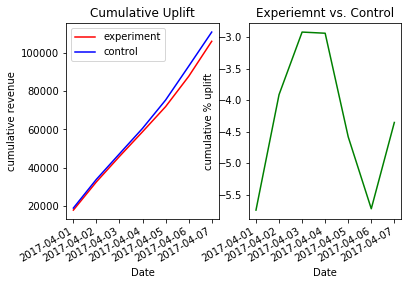

In [27]:

# test if this works
date_series = df.date
index_series = np.unique(date_series)
#index_series

PlotSeries(index_series, red, blue)

In [28]:
#date_series = df.date
#index_series = np.unique(date_series) # unique date
#index_series = np.sort(index_series) # sort by date
#print index_series

In [29]:
def PrintCumulativeTimeSeries(df,experiment_ids,country, vertical):
    df.date=pd.to_datetime(df.date, format='%Y%m%d')
    date_series = df.date
    index_series = np.unique(date_series) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    mdf = df.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(df, experiment_ids[0],country, vertical)
    control_series = GetSeries(df, experiment_ids[1],country, vertical)
    
    PlotSeries(index_series, treatment_series, control_series)

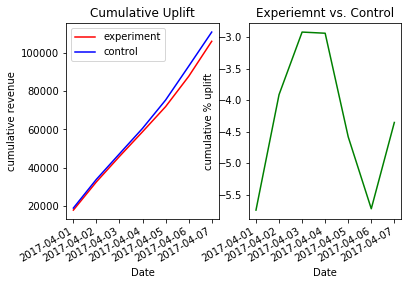

In [30]:

PrintCumulativeTimeSeries(df,[12624548,12624549],'US','ANDROID_APPS')